In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/creditcard.csv')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# **Data Exploratory**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Exploratory Data Analysis**

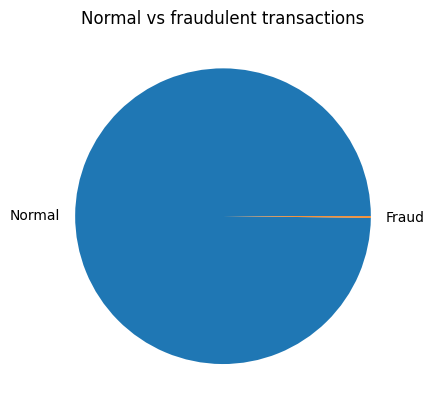

In [ ]:
fig, ax = plt.subplots()
ax.pie(df.groupby(['Class']).Class.count(), labels= ['Normal', 'Fraud'])
plt.title('Normal vs fraudulent transactions')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

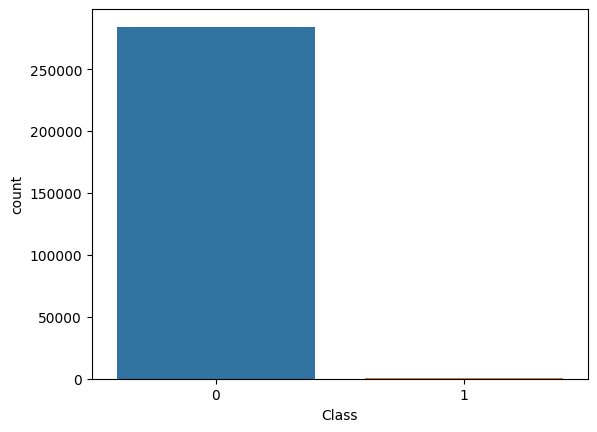

In [ ]:
sns.countplot(data=df, x='Class')

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
df['Class'] = df['Class'].astype('category')

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.histplot(data=df, x='Time', kde=True, ax=ax[0])
sns.boxplot(data=df, x='Time', ax=ax[1])

<Axes: xlabel='Amount'>

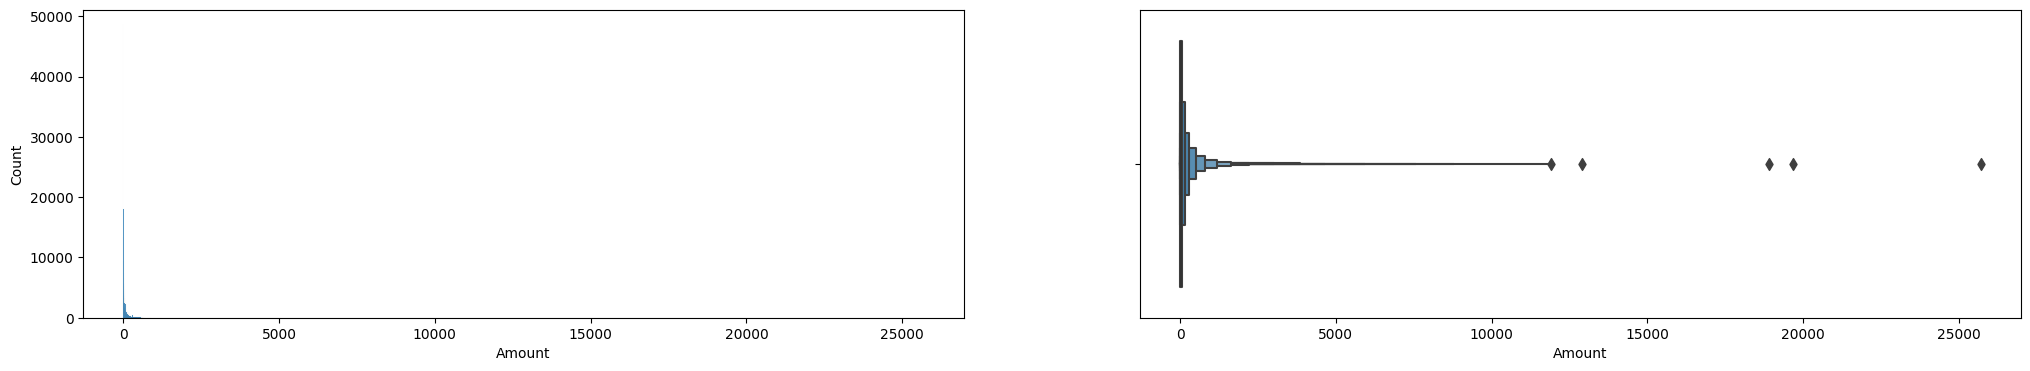

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.histplot(data=df, x= 'Amount', ax=ax[0])
sns.boxenplot(data=df, x= 'Amount', ax=ax[1])

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(25,4))
sns.countplot(data=df, x='Hour', ax=ax[0])
sns.boxenplot(data=df, x='Hour', ax=ax[1])

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.countplot(data=df[ df.Class == 0 ], x= 'Hour', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.countplot(data=df[ df.Class == 1 ], x= 'Hour', ax=axs[1])

plt.tight_layout()

In [ ]:
df.groupby('Class')['Hour'].describe()

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.boxenplot(data=df[ df.Class == 0 ], x= 'Amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.boxenplot(data=df[ df.Class == 1 ], x= 'Amount', ax=axs[1])

plt.tight_layout()

In [ ]:
df.groupby('Class')['Amount'].describe()

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20,8))
axs = axs.ravel()

axs[0].set_title("Non-Fraudulent Transaction")
sns.barplot(data=df[ df.Class == 0 ], x= 'Hour', y='Amount', ax=axs[0])

axs[1].set_title("Fraudulent Transaction")
sns.barplot(data=df[ df.Class == 1 ], x= 'Hour', y='Amount', ax=axs[1])

plt.tight_layout()

In [ ]:

# Custom colors for our data

gray_color = "#CCCCCC" # Grey for regular txs
red_color = "#F0544F" # Red for fraudulent txs
blue_color = "#8CA6F2" # Blue for heatmap
gold_color = '#F2D98C' # Gold for heatmap
green_color = '#A4F28C'# Green for confusion matrix
white_color = '#FFFFFF' # White for confusion matrix

color_pal = [gray_color, red_color]

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=color_pal,
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=color_pal,
            showfliers=False,
            ax=ax[1])

# Add titles to the plots
ax[0].set_title("Transaction Amount Box Plot (Including Fliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Fliers)")

# Update legend labels
legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)


plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(10, 4))

sns.scatterplot(data=df.loc[df.Class==0], 
                x='Time', 
                y='Amount', 
                color=gray_color,
                s=30,
                alpha=1,
                linewidth=0)

ax.set(xlabel=None, xticklabels=[])
plt.ylim(0, 3000)


sns.scatterplot(data=df.loc[df.Class==1], 
                x='Time', 
                y='Amount', 
                color=red_color,
                s=30,
                alpha=1,
                linewidth=0)
plt.ylim(0, 3000)

# Add title to the plot
ax.set_title("Transaction Amount Distribution Over Time")

plt.show()

In [ ]:
df = df.drop('Hour', axis=1)

In [ ]:
corr = df.corr(method='pearson')

<Axes: >

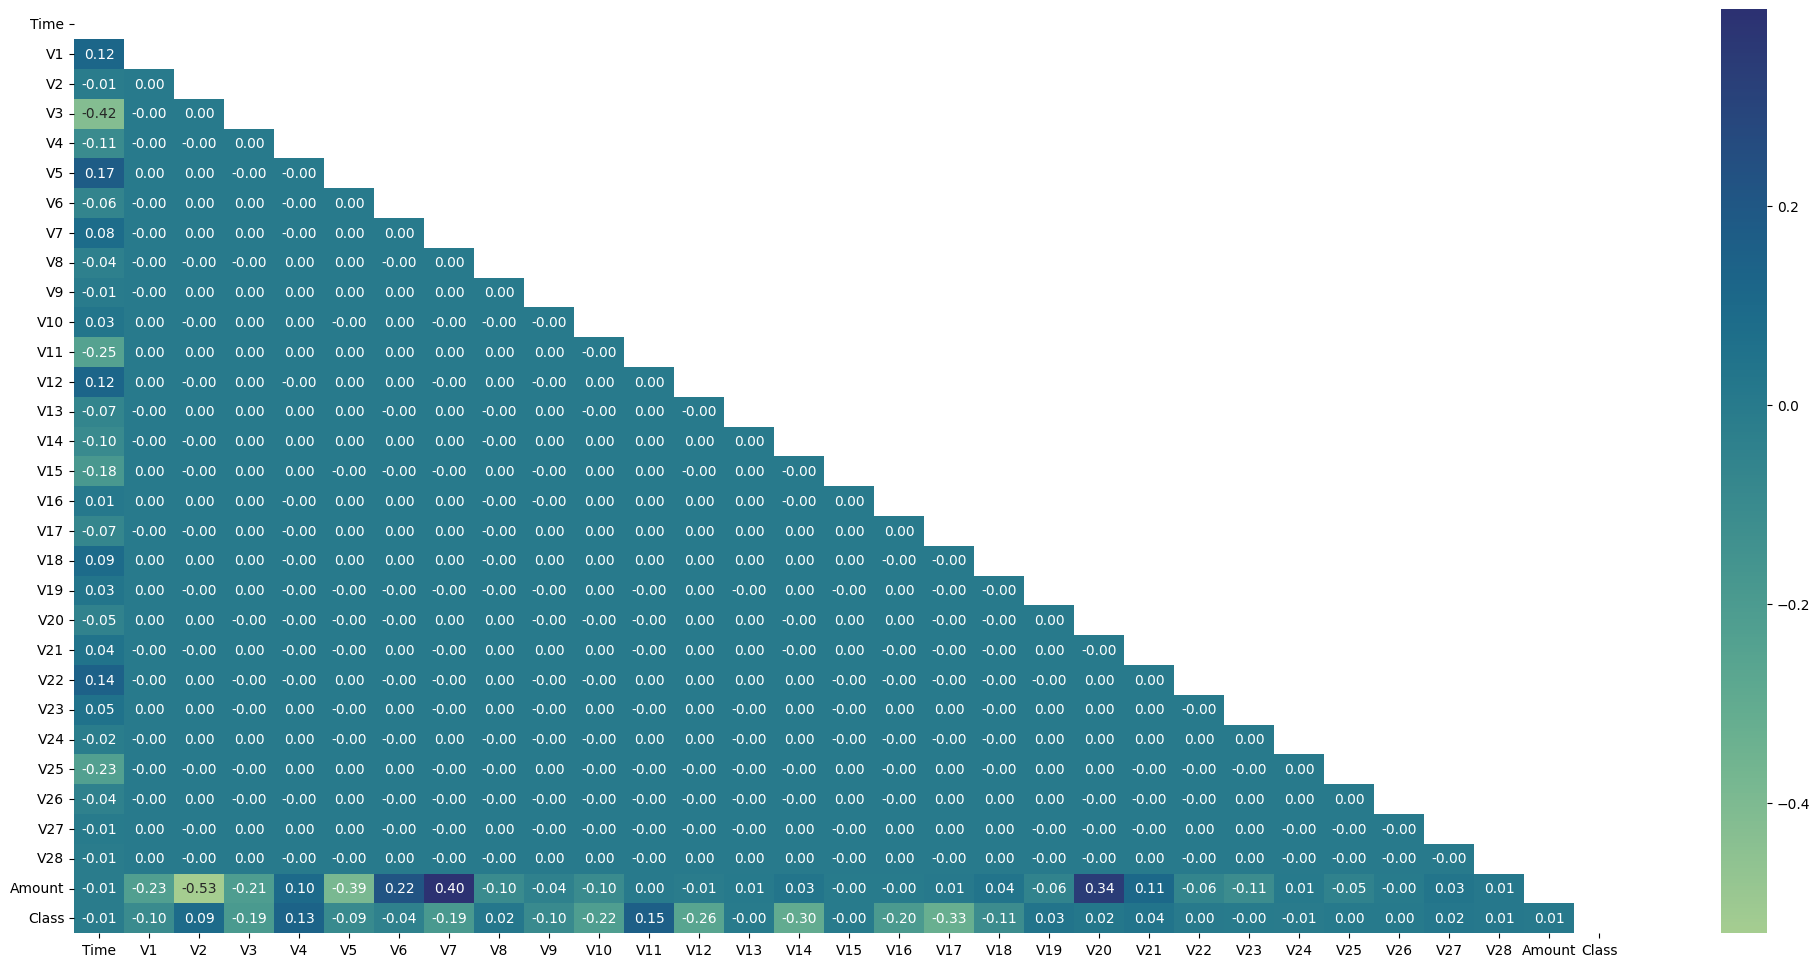

In [ ]:
plt.figure(figsize=(25,12))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            cmap='crest', 
            annot=True,
            fmt='.2f', 
            mask=mask)